In [63]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [64]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-10-10 04:13:04--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.42.227, 172.64.145.29, 2606:4700:4400::6812:2ae3, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.42.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   201MB/s    in 0.3s    

2024-10-10 04:13:05 (201 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [65]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [66]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [67]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [68]:
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [69]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [71]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,529,665 (51.61 MB)

 Trainable params: 13,529,665 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [73]:
# Coba coba cara dari gemini buat nentuin nilai step_per_epoch by data
steps_per_epoch = train_generator.samples // train_generator.batch_size
steps_per_epoch

48

In [74]:
# Coba coba cara dari gemini buat nentuin nilai validation_steps by data
validation_steps = validation_generator.samples // validation_generator.batch_size
validation_steps

5

In [75]:
# latih model dengan model.fit
model.fit(
      train_generator,
      epochs=25, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      verbose=2)

Epoch 1/25
48/48 - 30s - 626ms/step - accuracy: 0.5521 - loss: 0.7289 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 2/25
48/48 - 28s - 575ms/step - accuracy: 0.4844 - loss: 0.6896 - val_accuracy: 0.5000 - val_loss: 0.6761
Epoch 3/25
48/48 - 29s - 611ms/step - accuracy: 0.5052 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6691
Epoch 4/25
48/48 - 28s - 580ms/step - accuracy: 0.5208 - loss: 0.6872 - val_accuracy: 0.5000 - val_loss: 0.6913
Epoch 5/25
48/48 - 43s - 893ms/step - accuracy: 0.4740 - loss: 0.6947 - val_accuracy: 0.6500 - val_loss: 0.6897
Epoch 6/25
48/48 - 27s - 571ms/step - accuracy: 0.5312 - loss: 0.7001 - val_accuracy: 0.8000 - val_loss: 0.6816
Epoch 7/25
48/48 - 41s - 855ms/step - accuracy: 0.5573 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 8/25
48/48 - 41s - 853ms/step - accuracy: 0.5000 - loss: 0.6901 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 9/25
48/48 - 28s - 575ms/step - accuracy: 0.4792 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss:

Saving 24.png to 24.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
24.png
clean


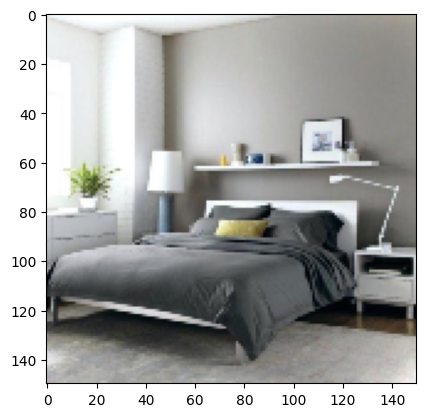

In [76]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')